In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# Modelo SIR-X que se aplica para todos los experimentos.
def deriv(y, t, N, alpha, beta, k0, k):
    S, I, R, X = y
    dSdt = -alpha * S * I / N - k0 * S
    dIdt = alpha * S * I / N - beta * I - k0 * I - k * I
    dRdt = beta * I + k0 * S
    dXdt = (k + k0) * I
    return dSdt, dIdt, dRdt, dXdt

# Alpha: tasa de contagio, Beta: 1/dias de recuperacion
alpha, beta = 0.48, 1/11 

# Poblacion total N
N = 100000


Bad key "text.kerning_factor" on line 4 in
/home/leo/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def getMejoresParametros(y0, muestrasReales):
    error = 99999999
    mejorK0, mejork = 0, 0
    k0 = 0.02
    
    while(k0 <= 0.035):
        k = 0.01
        while(k <= 0.025):
            ret = odeint(deriv, y0, t, args=(N, alpha, beta,k0,k))
            S, I, R, X = ret.T
            errorActual =(np.square(I - muestrasReales)).mean()
            if(errorActual < error):
                mejorK0 = k0
                mejork = k
                error = errorActual
            k = k + 0.001
        k0 = k0 + 0.001
    
    return round(error,2), round(mejorK0,3) , round(mejork,3)

In [3]:
def getECMBis(simulaciones, muestrasReales):
    error = (np.square((simulaciones - muestrasReales)/muestrasReales)).mean()
    return round( error, 3) 

# Perú

In [4]:
# Primeros 22 dias Peru
datosRealesPeru=[11, 17, 22, 38, 43, 71, 86, 117, 145, 234, 263, 318, 363, 395, 416, 480, 580, 635, 671, 852, 950, 1065]

# Numero inicial de infectados, removidos y aislados en cuarentena
I0, R0, X0 = 11, 0, 0
S0 = N - I0 - R0 - X0

# Tomar los primeros 22 dias (10/03 - 31/03)
t = np.linspace(0, 22, 22)

# Condiciones iniciales
y0Peru = S0, I0, R0, X0

In [5]:
#Calculo de mejores parametros para Peru
errorPeru, k0Peru, kPeru = getMejoresParametros(y0Peru, datosRealesPeru)

print("Error peru: " + str(errorPeru))
print("k0Peru: " + str(k0Peru))
print("kPeru: " + str(kPeru))

Error peru: 1597.2
k0Peru: 0.032
kPeru: 0.012


In [6]:
#Calculo de mejor aproximacion y error relativo
retPeru = odeint(deriv, y0Peru, t, args=(N, alpha, beta,k0Peru,kPeru))
susceptiblesPeru, infectadosPeru, removidosPeru, cuarentenaPeru = retPeru.T
print(getECMBis(infectadosPeru, datosRealesPeru))

0.024


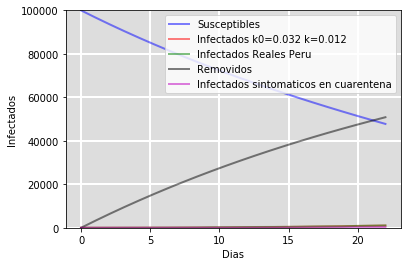

In [7]:
# Disminucion de susceptibles en base a aumento de removidos

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, susceptiblesPeru, 'b', alpha=0.5, lw=2, label='Susceptibles')
ax.plot(t, infectadosPeru, 'r', alpha=0.5, lw=2, label='Infectados k0=0.032 k=0.012')
ax.plot(t, datosRealesPeru, 'g', alpha=0.5, lw=2, label='Infectados Reales Peru')
ax.plot(t, removidosPeru, 'k', alpha=0.5, lw=2, label='Removidos')
ax.plot(t, cuarentenaPeru, 'm', alpha=0.5, lw=2, label='Infectados sintomaticos en cuarentena')
ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,100000)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()

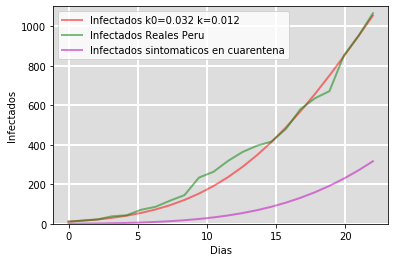

In [8]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, infectadosPeru, 'r', alpha=0.5, lw=2, label='Infectados k0=0.032 k=0.012')
ax.plot(t, datosRealesPeru, 'g', alpha=0.5, lw=2, label='Infectados Reales Peru')
ax.plot(t, cuarentenaPeru, 'm', alpha=0.5, lw=2, label='Infectados sintomaticos en cuarentena')
ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,1100)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()

Ultimo dia dato real Peru: 1065
Ultimo dia mejor aproximacion: 1053
Ultimo dia modelo SIR: 30136


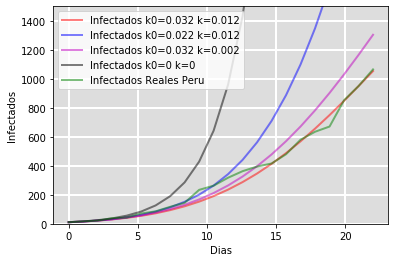

In [23]:
# Variacion de resultados en base a k0 y k

#Experimento2
ret2Peru = odeint(deriv, y0Peru, t, args=(N, alpha, beta,k0Peru-0.01,kPeru))
S2, infectadosPeru2, R2, X2 = ret2Peru.T

#Experimento3
ret3Peru = odeint(deriv, y0Peru, t, args=(N, alpha, beta,k0Peru,kPeru-0.01))
S3, infectadosPeru3, R3, X3 = ret3Peru.T

#Experimento4
ret4Peru = odeint(deriv, y0Peru, t, args=(N, alpha, beta,0,0))
S4, infectadosPeru4, R4, X4 = ret4Peru.T

print("Ultimo dia dato real Peru: " + str(math.trunc(datosRealesPeru[-1])))
print("Ultimo dia mejor aproximacion: " + str(math.trunc(infectadosPeru[-1])))
print("Ultimo dia modelo SIR: " + str(math.trunc(infectadosPeru4[-1])))


fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, infectadosPeru, 'r', alpha=0.5, lw=2, label='Infectados k0=0.032 k=0.012')
ax.plot(t, infectadosPeru2, 'b', alpha=0.5, lw=2, label='Infectados k0=0.022 k=0.012')
ax.plot(t, infectadosPeru3, 'm', alpha=0.5, lw=2, label='Infectados k0=0.032 k=0.002')
ax.plot(t, infectadosPeru4, 'k', alpha=0.5, lw=2, label='Infectados k0=0 k=0')
ax.plot(t, datosRealesPeru, 'g', alpha=0.5, lw=2, label='Infectados Reales Peru')

ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,1500)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()

# Chile

In [13]:
# Primeros 22 dias Chile
datosRealesChile=[17, 23, 33, 43, 61, 75, 156, 201, 238, 342, 434, 537, 632, 746, 922, 1142, 1306, 1610, 1909, 2139, 2449, 2738]

# Numero inicial de infectados, removidos y aislados en cuarentena
I0, R0, X0 = 17, 0, 0
S0 = N - I0 - R0 - X0

# Tomar los primeros 22 dias (10/03 - 31/03)
t = np.linspace(0, 22, 22)

# Condiciones iniciales
y0Chile = S0, I0, R0, X0

In [14]:
#Calculo de mejores parametros para Chile
errorChile, k0Chile, kChile = getMejoresParametros(y0Chile, datosRealesChile)

print("Error Chile: " + str(errorChile))
print("k0Chile: " + str(k0Chile))
print("kChile: " + str(kChile))

Error Chile: 2050.26
k0Chile: 0.026
kChile: 0.011


In [15]:
#Calculo de mejor aproximacion y error relativo
retChile = odeint(deriv, y0Chile, t, args=(N, alpha, beta,k0Chile,kChile))
susceptiblesChile, infectadosChile, removidosChile, cuarentenaChile = retChile.T
print(getECMBis(infectadosChile, datosRealesChile))

0.012


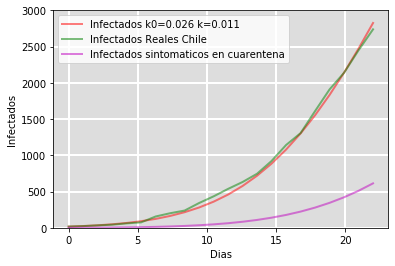

In [16]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, infectadosChile, 'r', alpha=0.5, lw=2, label='Infectados k0=0.026 k=0.011')
ax.plot(t, datosRealesChile, 'g', alpha=0.5, lw=2, label='Infectados Reales Chile')
ax.plot(t, cuarentenaChile, 'm', alpha=0.5, lw=2, label='Infectados sintomaticos en cuarentena')

ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,3000)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()

Ultimo dia dato real Chile: 2738
Ultimo dia mejor aproximacion: 2825
Ultimo dia modelo SIR: 36646


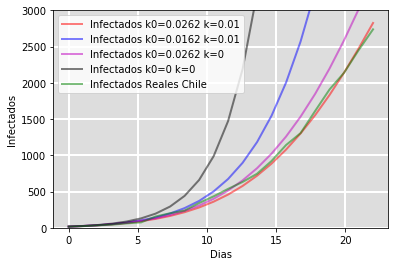

In [24]:
# Variacion de resultados en base a k0 y k

#Experimento2
ret2Chile = odeint(deriv, y0Chile, t, args=(N, alpha, beta,k0Chile-0.01,kChile))
S2, infectadosChile2, R2, X2 = ret2Chile.T

#Experimento3
ret3Chile = odeint(deriv, y0Chile, t, args=(N, alpha, beta,k0Chile,kChile-0.01))
S3, infectadosChile3, R3, X3 = ret3Chile.T

#Experimento4
ret4Chile = odeint(deriv, y0Chile, t, args=(N, alpha, beta,0,0))
S4, infectadosChile4, R4, X4 = ret4Chile.T

print("Ultimo dia dato real Chile: " + str(math.trunc(datosRealesChile[-1])))
print("Ultimo dia mejor aproximacion: " + str(math.trunc(infectadosChile[-1])))
print("Ultimo dia modelo SIR: " + str(math.trunc(infectadosChile4[-1])))


fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, infectadosChile, 'r', alpha=0.5, lw=2, label='Infectados k0=0.0262 k=0.01')
ax.plot(t, infectadosChile2, 'b', alpha=0.5, lw=2, label='Infectados k0=0.0162 k=0.01')
ax.plot(t, infectadosChile3, 'm', alpha=0.5, lw=2, label='Infectados k0=0.0262 k=0')
ax.plot(t, infectadosChile4, 'k', alpha=0.5, lw=2, label='Infectados k0=0 k=0')
ax.plot(t, datosRealesChile, 'g', alpha=0.5, lw=2, label='Infectados Reales Chile')

ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,3000)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()

# Brasil

In [18]:
# Primeros 22 dias Brasil
datosRealesBrasil=[34, 52, 77, 98, 121, 200, 234, 291, 428, 621, 904, 1128, 1546, 1891, 2201, 2433, 2915, 3417, 3903, 4256, 4579, 5717]

# Numero inicial de infectados, removidos y aislados en cuarentena
I0, R0, X0 = 34, 0, 0
S0 = N - I0 - R0 - X0

# Tomar los primeros 22 dias (10/03 - 31/03)
t = np.linspace(0, 22, 22)

# Condiciones iniciales
y0Brasil = S0, I0, R0, X0

In [19]:
#Calculo de mejores parametros para Brasil
errorBrasil, k0Brasil, kBrasil = getMejoresParametros(y0Brasil, datosRealesBrasil)

print("Error Brasil: " + str(errorBrasil))
print("k0Brasil: " + str(k0Brasil))
print("kBrasil: " + str(kBrasil))

Error Brasil: 36001.48
k0Brasil: 0.025
kBrasil: 0.01


In [20]:
#Calculo de mejor aproximacion y error relativo
retBrasil = odeint(deriv, y0Brasil, t, args=(N, alpha, beta,k0Brasil,kBrasil))
susceptiblesBrasil, infectadosBrasil, removidosBrasil, cuarentenaBrasil = retBrasil.T
print(getECMBis(infectadosBrasil, datosRealesBrasil))

0.012


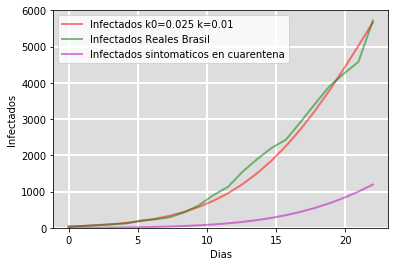

In [21]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, infectadosBrasil, 'r', alpha=0.5, lw=2, label='Infectados k0=0.025 k=0.01')
ax.plot(t, datosRealesBrasil, 'g', alpha=0.5, lw=2, label='Infectados Reales Brasil')
ax.plot(t, cuarentenaBrasil, 'm', alpha=0.5, lw=2, label='Infectados sintomaticos en cuarentena')

ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,6000)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()

Ultimo dia dato real Brasil: 5717
Ultimo dia mejor aproximacion: 5669
Ultimo dia modelo SIR: 44920


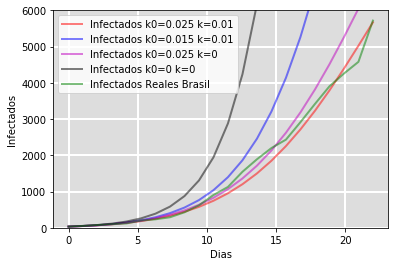

In [25]:
# Variacion de resultados en base a k0 y k

#Experimento2
ret2Brasil = odeint(deriv, y0Brasil, t, args=(N, alpha, beta,k0Brasil-0.01,kBrasil))
S2, infectadosBrasil2, R2, X2 = ret2Brasil.T

#Experimento3
ret3Brasil = odeint(deriv, y0Brasil, t, args=(N, alpha, beta,k0Brasil,kBrasil-0.01))
S3, infectadosBrasil3, R3, X3 = ret3Brasil.T

#Experimento4
ret4Brasil = odeint(deriv, y0Brasil, t, args=(N, alpha, beta,0,0))
S4, infectadosBrasil4, R4, X4 = ret4Brasil.T

print("Ultimo dia dato real Brasil: " + str(math.trunc(datosRealesBrasil[-1])))
print("Ultimo dia mejor aproximacion: " + str(math.trunc(infectadosBrasil[-1])))
print("Ultimo dia modelo SIR: " + str(math.trunc(infectadosBrasil4[-1])))

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, infectadosBrasil, 'r', alpha=0.5, lw=2, label='Infectados k0=0.025 k=0.01')
ax.plot(t, infectadosBrasil2, 'b', alpha=0.5, lw=2, label='Infectados k0=0.015 k=0.01')
ax.plot(t, infectadosBrasil3, 'm', alpha=0.5, lw=2, label='Infectados k0=0.025 k=0')
ax.plot(t, infectadosBrasil4, 'k', alpha=0.5, lw=2, label='Infectados k0=0 k=0')
ax.plot(t, datosRealesBrasil, 'g', alpha=0.5, lw=2, label='Infectados Reales Brasil')

ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,6000)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()

# Mexico

In [26]:
# Primeros 22 dias Mexico (11/03 01/04)
datosRealesMexico=[11, 15, 26, 41, 53, 78, 89, 118, 164, 203, 251, 316, 367, 405, 475, 585, 717, 848, 993, 1094, 1215, 1378]

# Numero inicial de infectados, removidos y aislados en cuarentena
I0, R0, X0 = 11, 0, 0
S0 = N - I0 - R0 - X0

# Tomar los primeros 22 dias (10/03 - 31/03)
t = np.linspace(0, 22, 22)

# Condiciones iniciales
y0Mexico = S0, I0, R0, X0

In [27]:
#Calculo de mejores parametros para Mexico
errorMexico, k0Mexico, kMexico = getMejoresParametros(y0Mexico, datosRealesMexico)

print("Error Mexico: " + str(errorMexico))
print("k0Mexico: " + str(k0Mexico))
print("kMexico: " + str(kMexico))

Error Mexico: 712.74
k0Mexico: 0.029
kMexico: 0.011


In [28]:
#Calculo de mejor aproximacion y error relativo
retMexico = odeint(deriv, y0Mexico, t, args=(N, alpha, beta,k0Mexico,kMexico))
susceptiblesMexico, infectadosMexico, removidosMexico, cuarentenaMexico = retMexico.T
print(getECMBis(infectadosMexico, datosRealesMexico))

0.017


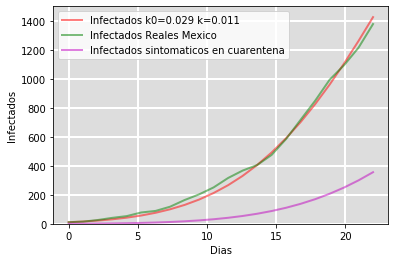

In [29]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, infectadosMexico, 'r', alpha=0.5, lw=2, label='Infectados k0=0.029 k=0.011')
ax.plot(t, datosRealesMexico, 'g', alpha=0.5, lw=2, label='Infectados Reales Mexico')
ax.plot(t, cuarentenaMexico, 'm', alpha=0.5, lw=2, label='Infectados sintomaticos en cuarentena')

ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,1500)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()

Ultimo dia dato real Mexico: 1378
Ultimo dia mejor aproximacion: 1425
Ultimo dia modelo SIR: 30136


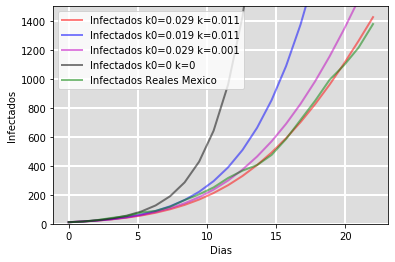

In [30]:
# Variacion de resultados en base a k0 y k

#Experimento2
ret2Mexico = odeint(deriv, y0Mexico, t, args=(N, alpha, beta,k0Mexico-0.01,kMexico))
S2, infectadosMexico2, R2, X2 = ret2Mexico.T

#Experimento3
ret3Mexico = odeint(deriv, y0Mexico, t, args=(N, alpha, beta,k0Mexico,kMexico-0.01))
S3, infectadosMexico3, R3, X3 = ret3Mexico.T

#Experimento4
ret4Mexico = odeint(deriv, y0Mexico, t, args=(N, alpha, beta,0,0))
S4, infectadosMexico4, R4, X4 = ret4Mexico.T

print("Ultimo dia dato real Mexico: " + str(math.trunc(datosRealesMexico[-1])))
print("Ultimo dia mejor aproximacion: " + str(math.trunc(infectadosMexico[-1])))
print("Ultimo dia modelo SIR: " + str(math.trunc(infectadosMexico4[-1])))

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, infectadosMexico, 'r', alpha=0.5, lw=2, label='Infectados k0=0.029 k=0.011')
ax.plot(t, infectadosMexico2, 'b', alpha=0.5, lw=2, label='Infectados k0=0.019 k=0.011')
ax.plot(t, infectadosMexico3, 'm', alpha=0.5, lw=2, label='Infectados k0=0.029 k=0.001')
ax.plot(t, infectadosMexico4, 'k', alpha=0.5, lw=2, label='Infectados k0=0 k=0')
ax.plot(t, datosRealesMexico, 'g', alpha=0.5, lw=2, label='Infectados Reales Mexico')

ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,1500)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()

# Ecuador


In [31]:
# Primeros 22 dias Ecuador (10/03 31/03)
datosRealesEcuador=[17, 17, 17, 23, 28, 37, 58, 111, 155, 260, 367, 532, 789, 981, 1082, 1211, 1403, 1627, 1835, 1924, 1966, 2302]

# Numero inicial de infectados, removidos y aislados en cuarentena
I0, R0, X0 = 17, 0, 0
S0 = N - I0 - R0 - X0

# Tomar los primeros 22 dias (10/03 - 31/03)
t = np.linspace(0, 22, 22)

# Condiciones iniciales
y0Ecuador = S0, I0, R0, X0

In [32]:
#Calculo de mejores parametros para Mexico
errorEcuador, k0Ecuador, kEcuador = getMejoresParametros(y0Ecuador, datosRealesEcuador)

print("Error Ecuador: " + str(errorEcuador))
print("k0Ecuador: " + str(k0Ecuador))
print("kEcuador: " + str(kEcuador))

Error Ecuador: 23099.97
k0Ecuador: 0.027
kEcuador: 0.012


In [33]:
#Calculo de mejor aproximacion y error relativo
retEcuador = odeint(deriv, y0Ecuador, t, args=(N, alpha, beta,k0Ecuador,kEcuador))
susceptiblesEcuador, infectadosEcuador, removidosEcuador, cuarentenaEcuador = retEcuador.T
print(getECMBis(infectadosEcuador, datosRealesEcuador))

0.37


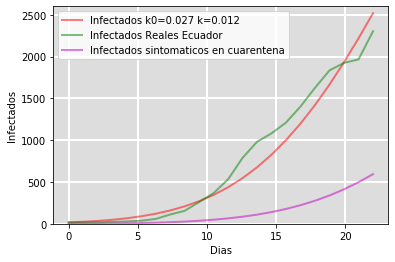

In [36]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, infectadosEcuador, 'r', alpha=0.5, lw=2, label='Infectados k0=0.027 k=0.012')
ax.plot(t, datosRealesEcuador, 'g', alpha=0.5, lw=2, label='Infectados Reales Ecuador')
ax.plot(t, cuarentenaEcuador, 'm', alpha=0.5, lw=2, label='Infectados sintomaticos en cuarentena')

ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,2600)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()

Ultimo dia dato real Ecuador: 2302
Ultimo dia mejor aproximacion: 2518
Ultimo dia modelo SIR: 30136


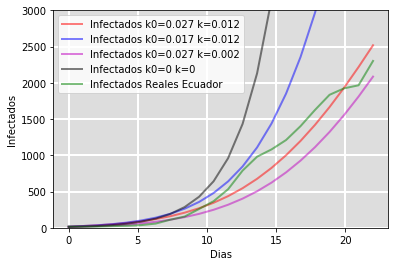

In [37]:
# Variacion de resultados en base a k0 y k

#Experimento2
ret2Ecuador = odeint(deriv, y0Ecuador, t, args=(N, alpha, beta,k0Ecuador-0.01,kEcuador))
S2, infectadosEcuador2, R2, X2 = ret2Ecuador.T

#Experimento3
ret3Ecuador = odeint(deriv, y0Mexico, t, args=(N, alpha, beta,k0Ecuador,kEcuador-0.01))
S3, infectadosEcuador3, R3, X3 = ret3Ecuador.T

#Experimento4
ret4Ecuador = odeint(deriv, y0Mexico, t, args=(N, alpha, beta,0,0))
S4, infectadosEcuador4, R4, X4 = ret4Ecuador.T

print("Ultimo dia dato real Ecuador: " + str(math.trunc(datosRealesEcuador[-1])))
print("Ultimo dia mejor aproximacion: " + str(math.trunc(infectadosEcuador[-1])))
print("Ultimo dia modelo SIR: " + str(math.trunc(infectadosEcuador4[-1])))


fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, infectadosEcuador, 'r', alpha=0.5, lw=2, label='Infectados k0=0.027 k=0.012')
ax.plot(t, infectadosEcuador2, 'b', alpha=0.5, lw=2, label='Infectados k0=0.017 k=0.012')
ax.plot(t, infectadosEcuador3, 'm', alpha=0.5, lw=2, label='Infectados k0=0.027 k=0.002')
ax.plot(t, infectadosEcuador4, 'k', alpha=0.5, lw=2, label='Infectados k0=0 k=0')
ax.plot(t, datosRealesEcuador, 'g', alpha=0.5, lw=2, label='Infectados Reales Ecuador')

ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,3000)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()

# Argentina

In [38]:
# Primeros 22 dias Argentina (10/03 31/03)
datosRealesArgentina=[19, 21, 31, 34, 45, 56, 65, 79, 97, 128, 158, 225, 266, 301, 387, 502, 589, 690, 745, 820, 966, 1054]

# Numero inicial de infectados, removidos y aislados en cuarentena
I0, R0, X0 = 19, 0, 0
S0 = N - I0 - R0 - X0

# Tomar los primeros 22 dias (10/03 - 31/03)
t = np.linspace(0, 22, 22)

# Condiciones iniciales
y0Argentina = S0, I0, R0, X0

In [39]:
#Calculo de mejores parametros para Argentina
errorArgentina, k0Argentina, kArgentina = getMejoresParametros(y0Argentina, datosRealesArgentina)

print("Error Argentina: " + str(errorArgentina))
print("k0Argentina: " + str(k0Argentina))
print("kArgentina: " + str(kArgentina))

Error Argentina: 9136.18
k0Argentina: 0.034
kArgentina: 0.024


In [40]:
#Calculo de mejor aproximacion y error relativo
retArgentina = odeint(deriv, y0Argentina, t, args=(N, alpha, beta,k0Argentina,kArgentina))
susceptiblesArgentina, infectadosArgentina, removidosArgentina, cuarentenaArgentina = retArgentina.T
print(getECMBis(infectadosArgentina, datosRealesArgentina))

0.223


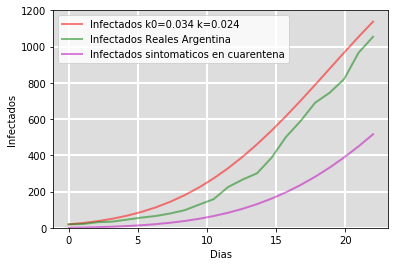

In [41]:
#Experimento1 (Mejor aproximacion)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, infectadosArgentina, 'r', alpha=0.5, lw=2, label='Infectados k0=0.034 k=0.024')
ax.plot(t, datosRealesArgentina, 'g', alpha=0.5, lw=2, label='Infectados Reales Argentina')
ax.plot(t, cuarentenaArgentina, 'm', alpha=0.5, lw=2, label='Infectados sintomaticos en cuarentena')

ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,1200)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()

Ultimo dia dato real Argentina: 1054
Ultimo dia mejor aproximacion: 1137
Ultimo dia modelo SIR: 38195


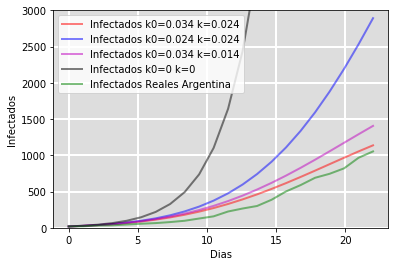

In [47]:
# Variacion de resultados en base a k0 y k

#Experimento2
ret2Argentina = odeint(deriv, y0Argentina, t, args=(N, alpha, beta,k0Argentina-0.01,kArgentina))
S2, infectadosArgentina2, R2, X2 = ret2Argentina.T

#Experimento3
ret3Argentina = odeint(deriv, y0Argentina, t, args=(N, alpha, beta,k0Argentina,kArgentina-0.01))
S3, infectadosArgentina3, R3, X3 = ret3Argentina.T

#Experimento4
ret4Argentina = odeint(deriv, y0Argentina, t, args=(N, alpha, beta,0,0))
S4, infectadosArgentina4, R4, X4 = ret4Argentina.T

print("Ultimo dia dato real Argentina: " + str(math.trunc(datosRealesArgentina[-1])))
print("Ultimo dia mejor aproximacion: " + str(math.trunc(infectadosArgentina[-1])))
print("Ultimo dia modelo SIR: " + str(math.trunc(infectadosArgentina4[-1])))


fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, infectadosArgentina, 'r', alpha=0.5, lw=2, label='Infectados k0=0.034 k=0.024')
ax.plot(t, infectadosArgentina2, 'b', alpha=0.5, lw=2, label='Infectados k0=0.024 k=0.024')
ax.plot(t, infectadosArgentina3, 'm', alpha=0.5, lw=2, label='Infectados k0=0.034 k=0.014')
ax.plot(t, infectadosArgentina4, 'k', alpha=0.5, lw=2, label='Infectados k0=0 k=0')
ax.plot(t, datosRealesArgentina, 'g', alpha=0.5, lw=2, label='Infectados Reales Argentina')

ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,3000)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()

# Uruguay

In [43]:
# Primeros 22 dias Uruguay (13 de marzo a 3 de abril)
datosRealesUruguay=[4,6, 8, 29, 50, 79, 94, 110, 135, 158, 162, 189, 217, 238, 274, 304, 309, 320, 338, 350, 369, 386]

# Numero inicial de infectados, removidos y aislados en cuarentena
I0, R0, X0 = 4, 0, 0
S0 = N - I0 - R0 - X0

# Tomar los primeros 22 dias (13/03 - 03/04)
t = np.linspace(0, 22, 22)

# Condiciones iniciales
y0Uruguay = S0, I0, R0, X0

In [44]:
#Calculo de mejores parametros para Uruguay
errorUruguay, k0Uruguay, kUruguay = getMejoresParametros(y0Uruguay, datosRealesUruguay)

print("Error Uruguay: " + str(errorUruguay))
print("k0Uruguay: " + str(k0Uruguay))
print("kUruguay: " + str(kUruguay))

Error Uruguay: 5017.96
k0Uruguay: 0.031
kUruguay: 0.01


In [45]:
#Calculo de mejor aproximacion y error relativo
retUruguay = odeint(deriv, y0Uruguay, t, args=(N, alpha, beta,k0Uruguay,kUruguay))
susceptiblesUruguay, infectadosUruguay, removidosUruguay, cuarentenaUruguay = retUruguay.T
print(getECMBis(infectadosUruguay, datosRealesUruguay))

0.21


Ultimo dia dato real Uruguay: 386
Ultimo dia mejor aproximacion: 454


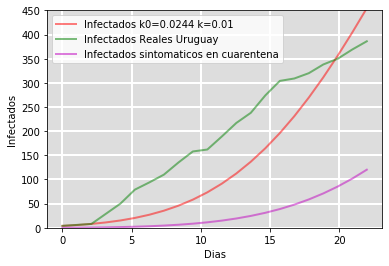

In [48]:
print("Ultimo dia dato real Uruguay: " + str(math.trunc(datosRealesUruguay[-1])))
print("Ultimo dia mejor aproximacion: " + str(math.trunc(infectadosUruguay[-1])))

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, infectadosUruguay, 'r', alpha=0.5, lw=2, label='Infectados k0=0.0244 k=0.01')
ax.plot(t, datosRealesUruguay, 'g', alpha=0.5, lw=2, label='Infectados Reales Uruguay')
ax.plot(t, cuarentenaUruguay, 'm', alpha=0.5, lw=2, label='Infectados sintomaticos en cuarentena')

ax.set_xlabel('Dias')
ax.set_ylabel('Infectados')
ax.set_ylim(0,450)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()

plt.show()